### Mandatory exercise #2. Numpy Neural Network
Almaz Ermilov

    almaz.ermilov@uit.no
    almaz.ermilov@gmail.com
    +47 97335582


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import time
np.random.seed(1)

In [ ]:
!pip list

In [83]:
def relu(x):
    return (x > 0) * x 

def relu_grad(x):
    return x > 0

#### Understanding the dataset
I guess here is our very very small dataset that we should work with, it is a 2D numpy array and it represents the input features X (in the code later). There is only 6 samples and every has 3 features. The name of the dataset "streetlights" and "walk_vs_stop" as output says us that this is a traffic light signals as inputs (red, yellow, green, and I see that they are binary) and output that we have is "walk_vs_stop" is also binary, so this is like recommendations to go or not to go 🌞

So, now at least I understand the data and the possible outcomes, and I would rather solve this assignment with this small dataset in a algorithmical way by just writing a simple logic for this task, and this fact says that this little dataset wouldn't require a huge and complex architecture, but we will see and think about a bit later. 

btw, this is ht epicture I took in Bergen 2 years ago, they have pretty stylish traffic lights, this one is for trams, not very related to our example I guess for this reason 🙂

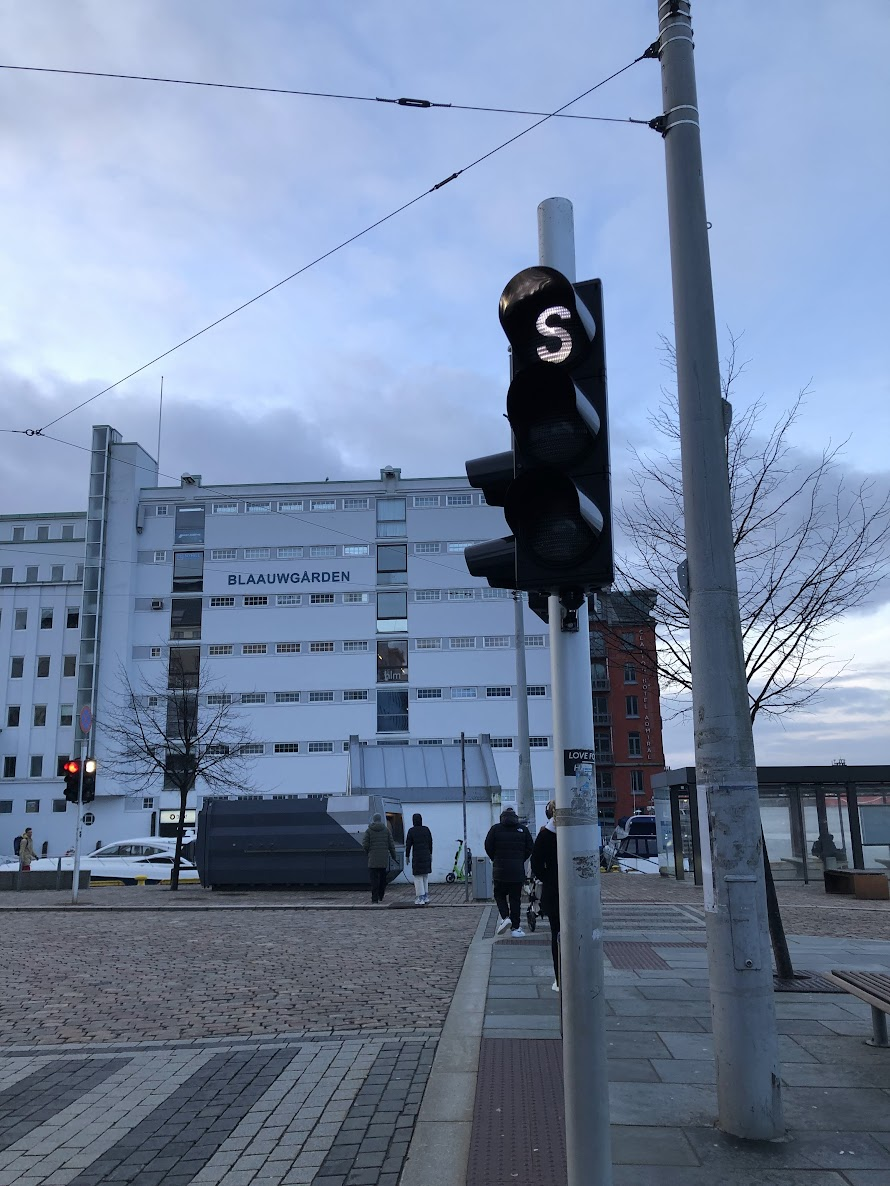

In [84]:
streetlights = np.array([[1,0,1], 
                         [0,1,1], 
                         [0,0,1], 
                         [1,1,1], 
                         [0,1,1], 
                         [1,0,1]])

In [85]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

In [86]:
X,y = streetlights, walk_vs_stop

In [87]:
hidden_nodes = 8

In [88]:
epochs = 100  # number of iterations to go through the network

lr = 0.01      # how much we change the weights of the network each iteration

In [89]:
ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5 # weights for the 1st layer
ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5 # weights for the 2nd layer

In [90]:
error_list = [] # list to store all errors
error_list_every_10th_epoch = [] # list to store error for every 10th epoch

for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
    for i in range(X.shape[0]): #for all samples in X, each streetlight
        layer_in = X[i:i+1]
        
        #forward pass/prediction
        layer_1 = relu(layer_in.dot(ws_1))
        
        layer_out = layer_1.dot(ws_2)
        
        #calc error/distance (how far are we from goal)
        delta_2 = layer_out - y[i:i+1]
        
        #calc the the error each node in prev layer contributed
        delta_1 = delta_2.dot(ws_2.T) * relu_grad(layer_1)
        
        #update weights
        ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2))
        ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))
        error = delta_2**2 # MSE
        error_list.append(round(error[0][0],6)) # appending all errors for every sample
    
    if epoch % 10 == 0: # we print error every 10 epochs
        error = delta_2**2
        print(round(error[0][0],6))#, end='\r')
        error_list_every_10th_epoch.append(round(error[0][0],6))
        

0.019479
0.046095
0.062677
0.061989
0.052434
0.041336
0.031658
0.024053
0.018328
0.01518


#### Let's discuss the default provided architecture here first
we have:
- input layer "streetlights" is 3 neurons (since we have 3 features for yellow, green and red)
- hidden layer is 8 neurons + ReLU
- output layer is 1 neuron (recomendations to go or not to go)
- weights ws_1 (shape 3, 8) and ws_2 (shape 8, 1) 

#### We can visualize it something like this for example
(pasted as a screenshot, because formatting is changed because of markdown after I wrote/draw it)

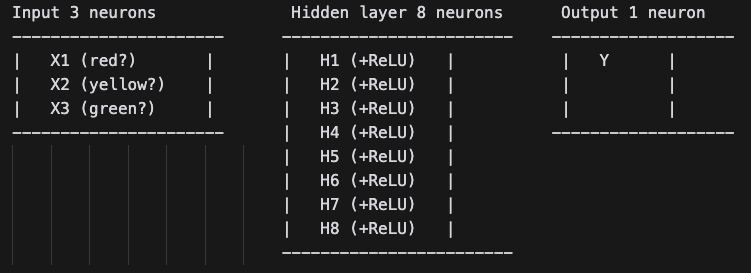

Now let's analyse the output of the training process, I can see that it is a bit weird a bit looking at numbers, but it is better to plot it

0.019479
0.046095
0.062677
0.061989
0.052434
0.041336
0.031658
0.024053
0.018328
0.015180


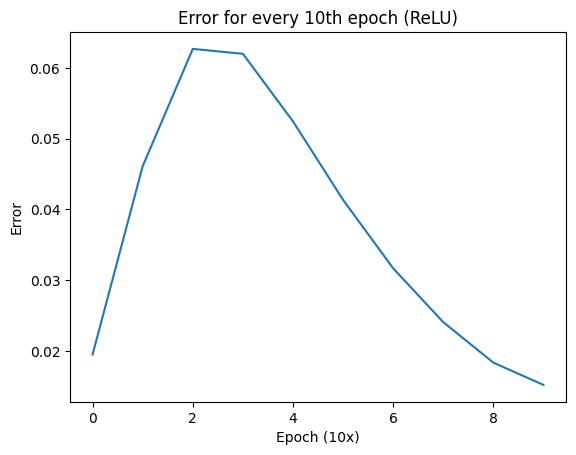

In [105]:
for error in error_list_every_10th_epoch:
    print(f"{error:.6f}")

plt.plot(error_list_every_10th_epoch)
plt.xlabel("Epoch (10x)")
plt.ylabel("Error")
plt.title("Error for every 10th epoch (ReLU)")
plt.show()
relu_plot = plt

#### Analysing the graph of "Error for every 10th epoch"
So, yeah, looking at numbers and the plot we can see that at the beginning the error was low, then started to increase and then got to the same error as in the beginnig (it is good though that we got the low MSE at the end, but the whole idea to have 100 epochs for 6 samples and 2 possible outcomes seems a bit crazy for me :), the neural network will be overfitted probably?)

#### Task 1 of the assignment: Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?
(I would rather change the architecture right now, but usually I just follow the tasks, so I proceed with the task exaclty it is asked)

In [95]:
def sigmoid(x): # sigmoid function as it is in the lecture slides
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x): # gradient of the sigmoid function, needed for backpropagation
    return x * (1 - x)

In [96]:
# initializing weights randomly again 
ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5 # weights for the 1st layer
ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5 # weights for the 2nd layer

In [97]:
# this is almost the same as before, but we use sigmoid activation function

error_list_sigmoid = [] # list to store all errors with sigmoid
error_list_every_10th_epoch_sigmoid = [] # list to store error for every 10th epoch with sigmoid

for epoch in range(epochs):     # number of training iterations, or times to change the weights of the nn
    for i in range(X.shape[0]): # for all samples in X, each streetlight
        layer_in = X[i:i+1]
        
        # forward pass/prediction
        layer_1 = sigmoid(layer_in.dot(ws_1))  # Use Sigmoid activation
        
        layer_out = layer_1.dot(ws_2)
        
        # calc error/distance (how far are we from goal)
        delta_2 = layer_out - y[i:i+1]
        
        # calc the error each node in prev layer contributed
        delta_1 = delta_2.dot(ws_2.T) * sigmoid_grad(layer_1)  # Use Sigmoid gradient
        
        # update weights
        ws_2 -= lr * (layer_1.T.reshape(hidden_nodes, 1).dot(delta_2))
        ws_1 -= lr * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
        error = delta_2**2 # MSE
        error_list_sigmoid.append(round(error[0][0], 6)) # appending all errors for every sample
    
    if epoch % 10 == 0: # we print error every 10 epochs
        error = delta_2**2
        print(round(error[0][0], 6))#, end='\r')
        error_list_every_10th_epoch_sigmoid.append(round(error[0][0], 6))

0.01111
0.068776
0.145658
0.1734
0.178587
0.175679
0.170052
0.163536
0.156739
0.149867


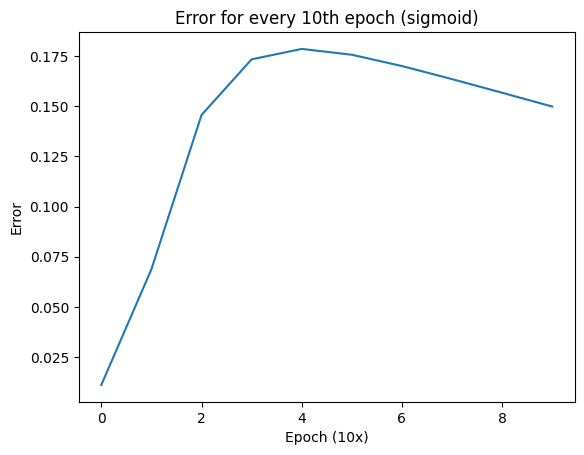

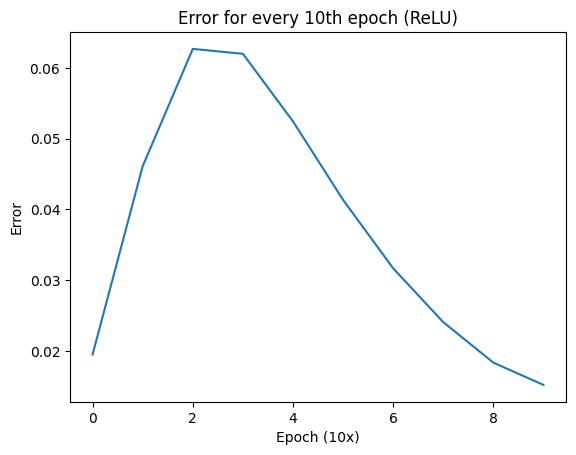

In [109]:

# let's plot the error for every 10th epoch for sigmoid now, it is much easier to analyse
plt.plot(error_list_every_10th_epoch_sigmoid)
plt.xlabel("Epoch (10x)")
plt.ylabel("Error")
plt.title("Error for every 10th epoch (sigmoid)")
plt.show()

# and let's compare it with the ReLU activation 
plt.plot(error_list_every_10th_epoch)
plt.xlabel("Epoch (10x)")
plt.ylabel("Error")
plt.title("Error for every 10th epoch (ReLU)")
plt.show()

#### Analysing sigmoid vs ReLU as activation function with the same architecture
1. I don't like that they both start with low error aand then the error goes comparetively high, I think the architecture that we have now is a bit over complicated for the comparatevly not complex data
2. Both looks kind of the same during the first ~ 30 epochs
3. Then both graphs begin to decrease, so the models are training, graphs decrease very differently
4. So, we see that ReLU performs "better" with a more significant decrease in error and "faster convergence" and sigmoid has higher error values during the end of the training, and this happens likely due to gradient issues like as vanishing gradients and saturation
5. The difference happens because of sigmoid activation can cause the vanishing gradient problem (we discussed it during the lectures) when gradients become very small, and this means slower learning (learning rate should be adjusted? next task) because the weights are updated slowly. Sigmoid also can saturate for very high or very low input values which reducing the gradient and slowing down learning (ReLU does not have these problems because its gradient is 0 or 1)  

#### Task 2: Do a search for the best learning rate. Also experiment with the necessary number of epochs. Use these values for learning rate: [0.001, 0.01, 0.1, 1, 10]. Report on your findings.



##### Let's create a function to train the model with different learning rates and epochs, based on the code provided in the assignment (above) **using ReLU activation**

In [125]:
def train_model(lr, epochs):
    hidden_nodes = 8 # same as before, we don't change the architecture

    # initializing weights randomly again 
    ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5 # weights for the 1st layer
    ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5 # weights for the 2nd layer
    
    error_list_every_5th_epoch = [] # list to store error for every 10th epoch

    for epoch in range(epochs):     # number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]): # for all samples in X, each streetlight
            layer_in = X[i:i+1]
            
            # forward pass/prediction
            layer_1 = relu(layer_in.dot(ws_1)) # using ReLU activation
            layer_out = layer_1.dot(ws_2)
            
            # calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1]
            
            # calc the error each node in prev layer contributed
            delta_1 = delta_2.dot(ws_2.T) * relu_grad(layer_1)
            
            # update weights
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes, 1).dot(delta_2))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
        
        if epoch % 5 == 0: # we print error every 10 epochs
            error = delta_2**2
            print(f"Learning Rate: {lr}, Epoch: {epoch}, Error: {round(error[0][0], 6)}")
            error_list_every_5th_epoch.append(round(error[0][0], 6))
    
    return error_list_every_5th_epoch


In [126]:
# define learning rates and epochs as it is asked in the task
learning_rates = [0.001, 0.01, 0.1, 1, 10]
epochs = 100 # same as before for now, we will see the results and maybe change it

# running experiments with different learning rates (epochs is the same as before)
results = {}
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    error_list = train_model(lr, epochs)
    results[lr] = error_list


Training with learning rate: 0.001
Learning Rate: 0.001, Epoch: 0, Error: 0.005931
Learning Rate: 0.001, Epoch: 5, Error: 0.007326
Learning Rate: 0.001, Epoch: 10, Error: 0.008815
Learning Rate: 0.001, Epoch: 15, Error: 0.010384
Learning Rate: 0.001, Epoch: 20, Error: 0.012022
Learning Rate: 0.001, Epoch: 25, Error: 0.013714
Learning Rate: 0.001, Epoch: 30, Error: 0.01545
Learning Rate: 0.001, Epoch: 35, Error: 0.017218
Learning Rate: 0.001, Epoch: 40, Error: 0.019007
Learning Rate: 0.001, Epoch: 45, Error: 0.020808
Learning Rate: 0.001, Epoch: 50, Error: 0.02261
Learning Rate: 0.001, Epoch: 55, Error: 0.024405
Learning Rate: 0.001, Epoch: 60, Error: 0.026184
Learning Rate: 0.001, Epoch: 65, Error: 0.02794
Learning Rate: 0.001, Epoch: 70, Error: 0.029666
Learning Rate: 0.001, Epoch: 75, Error: 0.031355
Learning Rate: 0.001, Epoch: 80, Error: 0.033001
Learning Rate: 0.001, Epoch: 85, Error: 0.0346
Learning Rate: 0.001, Epoch: 90, Error: 0.036147
Learning Rate: 0.001, Epoch: 95, Error: 0

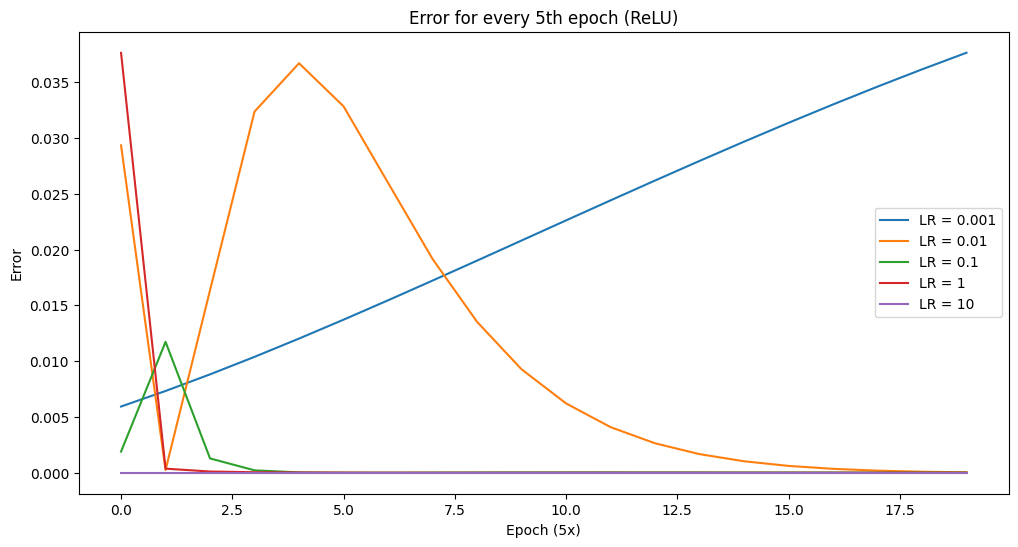

In [127]:
# plotting the results
plt.figure(figsize=(12, 6))
for lr, errors in results.items():
    plt.plot(errors, label=f'LR = {lr}')
plt.xlabel('Epoch (5x)')
plt.ylabel('Error')
plt.title('Error for every 5th epoch (ReLU)')
plt.legend()
plt.show()

#### Let's analyze the graphs and the results	
1. We can visually see and look a the numbers and say that the best learning rate (LR below in the text) is 1 and 0.1  for this task with the current architecture because of fast convergence and low error values
2. LR 1 is good, probably 3-10 epochs is enough as we see on the graph (then it is overfitting), so this is the most efficient model in my opinion.
3. LR 0.1 and 0.01 is good, but I don't like that we start with a low error and then it goes higher
4. LR 0.001 is too low because we can se that the model can't learn properly with with this small rate of changes (underfitting).
5. LR 10 is too high, the model is converging very fast that lead to underfitting as far as I understand it.
6. Number of epochs: LR 1 and LR 0.1 converges very fast, so we can stop training after ~ 10 epochs (2 epochs x 5 since we save error after every 5th epoch)

#### Task 3: Add another “hidden” layer(hidden layers exist between the input and output layers). Choose the size of the layer yourself. Retrain the network. Here, your knowledge about learning rate and epochs from the previous task might come in handy. Is this network more or less performant than the previous version? What does this change imply?

In [187]:
# a new function to train the model with an additional hidden layer
def train_model_with_additional_hidden_layer(lr, epochs):
    input_size = 3 # same as before, but hardcoded here
    hidden_nodes_1 = 8 # same as before, but hardcoded
    hidden_nodes_2 = 4  # new hidden layer size, I wouldn't say we need a lot of neurons here, because we have a quite simple dataset
    output_size = 1 # same as before, but hardcoded

    # initializing weights randomly again
    ws_1 = np.random.rand(input_size, hidden_nodes_1)
    ws_2 = np.random.rand(hidden_nodes_1, hidden_nodes_2)
    ws_3 = np.random.rand(hidden_nodes_2, output_size)

    error_list_every_epoch = [] # list to store error for every epoch

    for epoch in range(epochs):     # number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]): # for all samples in X, each streetlight
            layer_in = X[i:i+1]
            
            # forward pass/prediction
            layer_1 = relu(layer_in.dot(ws_1))
            layer_2 = relu(layer_1.dot(ws_2))  # new hidden layer
            layer_out = layer_2.dot(ws_3)
            
            # calc error/distance (how far are we from goal)
            delta_3 = layer_out - y[i:i+1]
            
            # calc the error each node in prev layer contributed
            delta_2 = delta_3.dot(ws_3.T) * relu_grad(layer_2)
            delta_1 = delta_2.dot(ws_2.T) * relu_grad(layer_1)
            
            # update weights
            ws_3 -= lr * (layer_2.T.reshape(hidden_nodes_2, 1).dot(delta_3))
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes_1, 1).dot(delta_2))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
        
        # we print error every epochs
        error = delta_3**2
        # print(f"Learning Rate: {lr}, Epoch: {epoch}, Error: {error[0][0]}")
        error_list_every_epoch.append(round(error[0][0], 6))
    
    return error_list_every_epoch


#### We changed the model, so I think we need to change the LR too, LR 0.1 and 0.01 was good in the previous task

In [177]:
# defining learning rate and epochs
learning_rate = 0.04 # we changed the model, so I think we need to change the LR too, LR 0.1 and 0.01 was good in the previous task
epochs = 50 # less epochs because the model converges very fast in the previous task

# train the model with the additional hidden layer
print(f"Training with learning rate: {learning_rate}")
error_list = train_model_with_additional_hidden_layer(learning_rate, epochs)


Training with learning rate: 0.04
Learning Rate: 0.04, Epoch: 0, Error: 0.017051849348992364
Learning Rate: 0.04, Epoch: 1, Error: 0.009789150385941569
Learning Rate: 0.04, Epoch: 2, Error: 0.005639957197938776
Learning Rate: 0.04, Epoch: 3, Error: 0.0032561190369636782
Learning Rate: 0.04, Epoch: 4, Error: 0.0018820861277139146
Learning Rate: 0.04, Epoch: 5, Error: 0.0010886188676583533
Learning Rate: 0.04, Epoch: 6, Error: 0.0006299179154695485
Learning Rate: 0.04, Epoch: 7, Error: 0.0003645787864101686
Learning Rate: 0.04, Epoch: 8, Error: 0.00021103588270432425
Learning Rate: 0.04, Epoch: 9, Error: 0.0001221671606317253
Learning Rate: 0.04, Epoch: 10, Error: 7.0724829700793e-05
Learning Rate: 0.04, Epoch: 11, Error: 4.094496338461696e-05
Learning Rate: 0.04, Epoch: 12, Error: 2.3704757492747542e-05
Learning Rate: 0.04, Epoch: 13, Error: 1.3723796896491165e-05
Learning Rate: 0.04, Epoch: 14, Error: 7.94538983474575e-06
Learning Rate: 0.04, Epoch: 15, Error: 4.59999533047214e-06
Lear

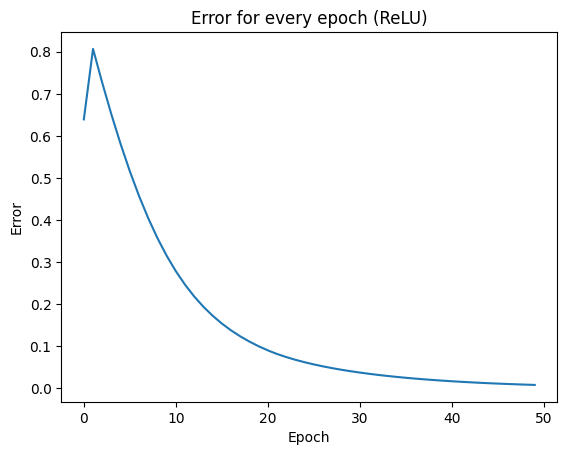

In [188]:
# defining learning rate and epochs
learning_rate = 0.04 # we changed the model, so I think we need to change the LR too, LR 0.1 and 0.01 was good in the previous task
epochs = 50 # less epochs because the model converges very fast in the previous task

# train the model with the additional hidden layer
# plotting the results
plt.plot(train_model_with_additional_hidden_layer(learning_rate, epochs))
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error for every epoch (ReLU)")
plt.show()

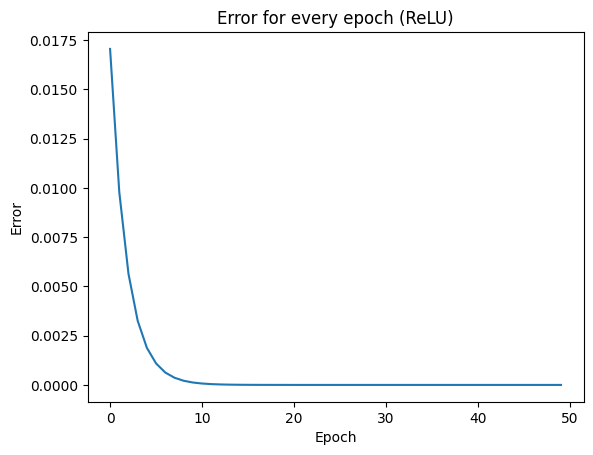

In [178]:
#plotting the results
plt.plot(error_list)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error for every epoch (ReLU)")
plt.show()


#### Here above is the model overfitted after ~ 10 epochs that means that we can stop at the 10th epoch (some libraries use EarlyStop for this), maybe we were lucky with the random weights, I tried different runs and parameters, results are approximately the same as in these 2 pictures, the best is to have learning rate that is decaying epoch after epoch, usually it is a good practice

#### The network with 2 hidden layers appears more performant (less epochs needed) than the previous version (at the same time it is a bit hard to compare them directly since we changed the learning rate)
And the error plots above shows that the new model with the additional hidden layer converges much faster compared to the previous single hidden layer model. 
It's important to note again that for this simple traffic lights task and the dataset, increased complexity of the model might not be necessary (could easily lead to overfitting).


#### Task 4. Understanding the effect of activation function: Repeat the experiment as in 3. but by including an activation functions at various stages as shown.
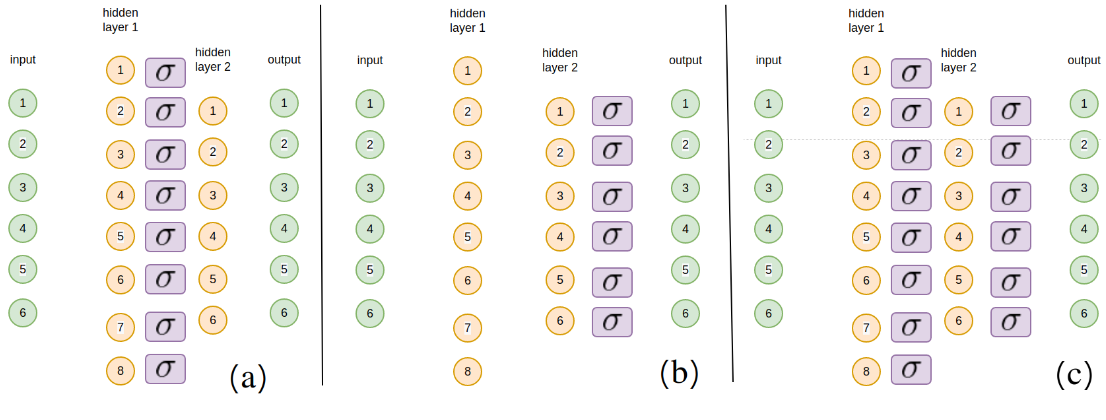

##### Let's create a function train_model_with_additional_hidden_layer_and_activation_scenarios

In [244]:
def train_model_with_additional_hidden_layer_and_activation_scenarios(lr, epochs, activation_scenario, initial_weights, hidden_nodes_1, hidden_nodes_2):
    ws_1, ws_2, ws_3 = initial_weights
    
    error_list_every_epoch = []

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            layer_in = X[i:i+1]
            
            # forward pass with different activation scenarios
            if activation_scenario == 'a':
                layer_1 = relu(layer_in.dot(ws_1))
                layer_2 = layer_1.dot(ws_2)
                layer_out = layer_2.dot(ws_3)
            elif activation_scenario == 'b':
                layer_1 = layer_in.dot(ws_1)
                layer_2 = relu(layer_1.dot(ws_2))
                layer_out = layer_2.dot(ws_3)
            else:  # scenario 'c'
                layer_1 = relu(layer_in.dot(ws_1))
                layer_2 = relu(layer_1.dot(ws_2))
                layer_out = layer_2.dot(ws_3)
            
            # calculate error
            delta_3 = layer_out - y[i:i+1]
            
            # backpropagation with different activation scenarios
            if activation_scenario == 'a':
                delta_2 = delta_3.dot(ws_3.T)
                delta_1 = delta_2.dot(ws_2.T) * relu_grad(layer_1)
            elif activation_scenario == 'b':
                delta_2 = delta_3.dot(ws_3.T) * relu_grad(layer_2)
                delta_1 = delta_2.dot(ws_2.T)
            else:  # scenario 'c'
                delta_2 = delta_3.dot(ws_3.T) * relu_grad(layer_2)
                delta_1 = delta_2.dot(ws_2.T) * relu_grad(layer_1)
            
            # updating weights
            ws_3 -= lr * (layer_2.T.reshape(hidden_nodes_2, 1).dot(delta_3))
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes_1, 1).dot(delta_2))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
        

        error = delta_3**2
        if epoch % 2 == 0:  # print every second epoch
            print(f"Learning Rate: {lr}, Epoch: {epoch}, Error: {round(error[0][0], 6)}")
        error_list_every_epoch.append(round(error[0][0], 6))
    
    return error_list_every_epoch


In [247]:
# let's initialize random weights once to compare all scenarios better
input_size = 3
hidden_nodes_1 = 8
hidden_nodes_2 = 4
output_size = 1

ws_1 = np.random.rand(input_size, hidden_nodes_1) - 0.5
ws_2 = np.random.rand(hidden_nodes_1, hidden_nodes_2) - 0.5
ws_3 = np.random.rand(hidden_nodes_2, output_size) - 0.5

#### Let's train models for each scenario now

Learning Rate: 0.04, Epoch: 0, Error: 0.010986
Learning Rate: 0.04, Epoch: 2, Error: 0.030181
Learning Rate: 0.04, Epoch: 4, Error: 0.061085
Learning Rate: 0.04, Epoch: 6, Error: 0.09905
Learning Rate: 0.04, Epoch: 8, Error: 0.129882
Learning Rate: 0.04, Epoch: 10, Error: 0.140946
Learning Rate: 0.04, Epoch: 12, Error: 0.132989
Learning Rate: 0.04, Epoch: 14, Error: 0.117493
Learning Rate: 0.04, Epoch: 16, Error: 0.096888
Learning Rate: 0.04, Epoch: 18, Error: 0.077629
Learning Rate: 0.04, Epoch: 20, Error: 0.062481
Learning Rate: 0.04, Epoch: 22, Error: 0.048583
Learning Rate: 0.04, Epoch: 24, Error: 0.037749
Learning Rate: 0.04, Epoch: 26, Error: 0.02933
Learning Rate: 0.04, Epoch: 28, Error: 0.02269
Learning Rate: 0.04, Epoch: 30, Error: 0.016876
Learning Rate: 0.04, Epoch: 32, Error: 0.012701
Learning Rate: 0.04, Epoch: 34, Error: 0.009505
Learning Rate: 0.04, Epoch: 36, Error: 0.00712
Learning Rate: 0.04, Epoch: 38, Error: 0.005275
Learning Rate: 0.04, Epoch: 0, Error: 0.02421
Lea

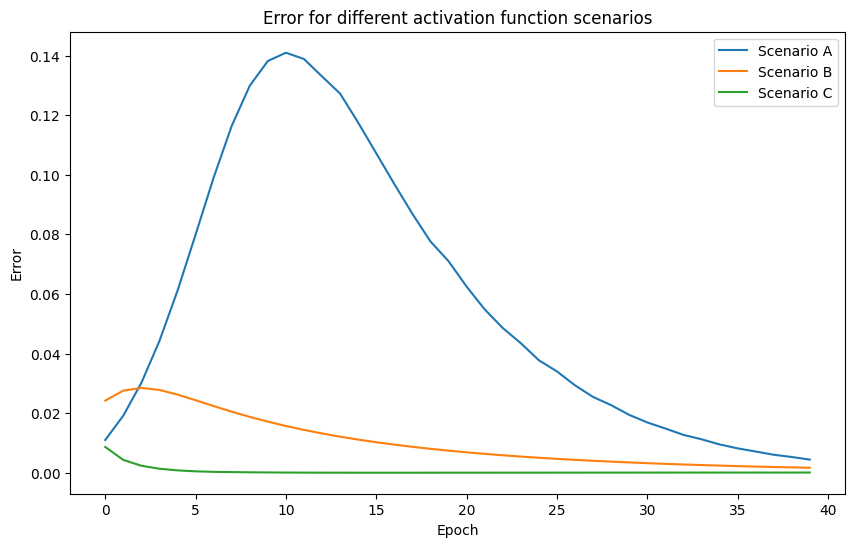

In [248]:
# let's train models for each scenario
learning_rate = 0.04
epochs = 40
initial_weights = (ws_1.copy(), ws_2.copy(), ws_3.copy())

error_a = train_model_with_additional_hidden_layer_and_activation_scenarios(learning_rate, epochs, 'a', initial_weights, hidden_nodes_1, hidden_nodes_2)
error_b = train_model_with_additional_hidden_layer_and_activation_scenarios(learning_rate, epochs, 'b', initial_weights, hidden_nodes_1, hidden_nodes_2)
error_c = train_model_with_additional_hidden_layer_and_activation_scenarios(learning_rate, epochs, 'c', initial_weights, hidden_nodes_1, hidden_nodes_2)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_a, label='Scenario A')
plt.plot(error_b, label='Scenario B')
plt.plot(error_c, label='Scenario C')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error for different activation function scenarios")
plt.legend()
plt.show()

#### My observations and the results and correlating this to theory in the task 4
- Scenario a): worse learning because of insufficient non-linearity at later stages (it took some time for me to understand that technicaly ReLU is also non-linear)
- Scenario b): much better learning because there is non-linearity right before the output
- Scenario c): seems as best performance (probably overfitted after 5 epochs) because non-linear transformations applied at all stages, better gradient flow and faster and more efficient learning


#### It's important to note again that for this simple traffic lights task and the dataset, increased complexity of the model might not be necessary (could easily lead to overfitting).

### Let's repeat it with **Sigmoid** instead of ReLU

In [252]:
def train_model_with_additional_hidden_layer_and_activation_scenarios(lr, epochs, activation_scenario, initial_weights, hidden_nodes_1, hidden_nodes_2):
    ws_1, ws_2, ws_3 = initial_weights
    
    error_list_every_epoch = []

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            layer_in = X[i:i+1]
            
            # forward pass with different activation scenarios
            if activation_scenario == 'a':
                layer_1 = sigmoid(layer_in.dot(ws_1))
                layer_2 = layer_1.dot(ws_2)
                layer_out = layer_2.dot(ws_3)
            elif activation_scenario == 'b':
                layer_1 = layer_in.dot(ws_1)
                layer_2 = sigmoid(layer_1.dot(ws_2))
                layer_out = layer_2.dot(ws_3)
            else:  # scenario 'c'
                layer_1 = sigmoid(layer_in.dot(ws_1))
                layer_2 = sigmoid(layer_1.dot(ws_2))
                layer_out = layer_2.dot(ws_3)
            
            # calculate error
            delta_3 = layer_out - y[i:i+1]
            
            # backpropagation with different activation scenarios
            if activation_scenario == 'a':
                delta_2 = delta_3.dot(ws_3.T)
                delta_1 = delta_2.dot(ws_2.T) * sigmoid_grad(layer_1)
            elif activation_scenario == 'b':
                delta_2 = delta_3.dot(ws_3.T) * sigmoid_grad(layer_2)
                delta_1 = delta_2.dot(ws_2.T)
            else:  # scenario 'c'
                delta_2 = delta_3.dot(ws_3.T) * sigmoid_grad(layer_2)
                delta_1 = delta_2.dot(ws_2.T) * sigmoid_grad(layer_1)
            
            # updating weights
            ws_3 -= lr * (layer_2.T.reshape(hidden_nodes_2, 1).dot(delta_3))
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes_1, 1).dot(delta_2))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1], 1).dot(delta_1))
        
        error = delta_3**2
        if epoch % 3 == 0:  # print every second epoch
            print(f"Learning Rate: {lr}, Epoch: {epoch}, Error: {round(error[0][0], 6)}")
        error_list_every_epoch.append(round(error[0][0], 6))
    
    return error_list_every_epoch

In [258]:
# let's initialize random weights once to compare all scenarios better
input_size = 3
hidden_nodes_1 = 8
hidden_nodes_2 = 4
output_size = 1

ws_1 = np.random.rand(input_size, hidden_nodes_1) - 0.5
ws_2 = np.random.rand(hidden_nodes_1, hidden_nodes_2) - 0.5
ws_3 = np.random.rand(hidden_nodes_2, output_size) - 0.5

Learning Rate: 0.04, Epoch: 0, Error: 0.003736
Learning Rate: 0.04, Epoch: 3, Error: 0.163223
Learning Rate: 0.04, Epoch: 6, Error: 0.251708
Learning Rate: 0.04, Epoch: 9, Error: 0.268966
Learning Rate: 0.04, Epoch: 12, Error: 0.266511
Learning Rate: 0.04, Epoch: 15, Error: 0.25955
Learning Rate: 0.04, Epoch: 18, Error: 0.251255
Learning Rate: 0.04, Epoch: 21, Error: 0.242151
Learning Rate: 0.04, Epoch: 24, Error: 0.232236
Learning Rate: 0.04, Epoch: 27, Error: 0.22141
Learning Rate: 0.04, Epoch: 30, Error: 0.209576
Learning Rate: 0.04, Epoch: 33, Error: 0.196663
Learning Rate: 0.04, Epoch: 36, Error: 0.182641
Learning Rate: 0.04, Epoch: 39, Error: 0.167543
Learning Rate: 0.04, Epoch: 0, Error: 0.16351
Learning Rate: 0.04, Epoch: 3, Error: 0.000762
Learning Rate: 0.04, Epoch: 6, Error: 0.025591
Learning Rate: 0.04, Epoch: 9, Error: 0.063835
Learning Rate: 0.04, Epoch: 12, Error: 0.085719
Learning Rate: 0.04, Epoch: 15, Error: 0.092144
Learning Rate: 0.04, Epoch: 18, Error: 0.08884
Lear

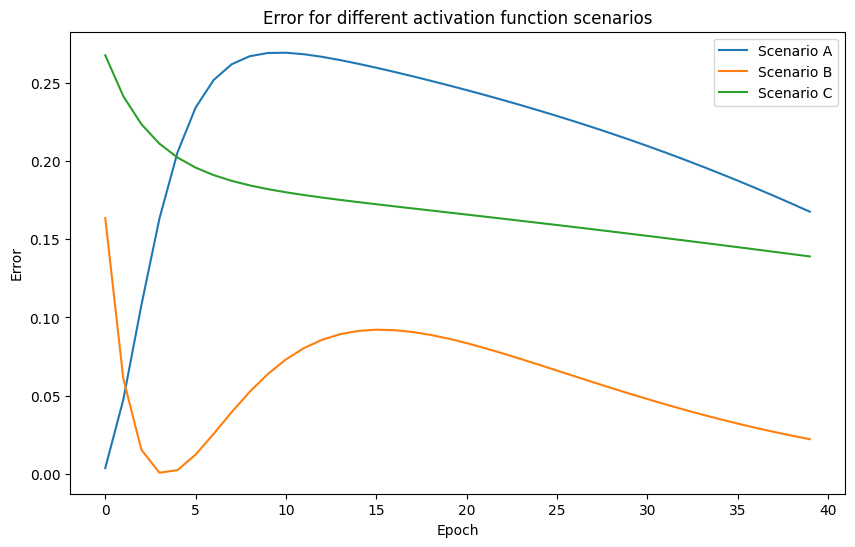

In [259]:
# let's train models for each scenario with sigmoid
learning_rate = 0.04
epochs = 40
initial_weights = (ws_1.copy(), ws_2.copy(), ws_3.copy())

error_a = train_model_with_additional_hidden_layer_and_activation_scenarios(learning_rate, epochs, 'a', initial_weights, hidden_nodes_1, hidden_nodes_2)
error_b = train_model_with_additional_hidden_layer_and_activation_scenarios(learning_rate, epochs, 'b', initial_weights, hidden_nodes_1, hidden_nodes_2)
error_c = train_model_with_additional_hidden_layer_and_activation_scenarios(learning_rate, epochs, 'c', initial_weights, hidden_nodes_1, hidden_nodes_2)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_a, label='Scenario A')
plt.plot(error_b, label='Scenario B')
plt.plot(error_c, label='Scenario C')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error for different activation function scenarios")
plt.legend()
plt.show()

### My observations and the results and correlating this to theory in the task 4 (**Sigmoid**)
- Scenario a) shows that insufficient non-linearity (activation only after the first hidden layer) leads to slow and unstable learning.
- Scenario b) shows that applying activation at later stages slightly improves learning, but without activation after the first hidden layer, there is still some "instability" on the plot.
- Scenario c) confirms the expectation that having non-linearity at both stages leads to the most stable and efficient learning process with a steady decrease in error (we need more epochs here).
